In [8]:
import pandas as pd
import FinanceDataReader as fdr
import numpy as np
import datetime

In [2]:
df = fdr.DataReader("^RUT", start="2020-01-01")
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1675.900024,1678.140015,1653.520020,1666.770020,1666.770020,3459930000
2020-01-03,1655.020020,1664.040039,1648.540039,1660.869995,1660.869995,3484700000
2020-01-06,1650.660034,1664.849976,1645.510010,1663.260010,1663.260010,3702460000
2020-01-07,1659.729980,1662.099976,1653.329956,1658.310059,1658.310059,3435910000
2020-01-08,1658.469971,1669.290039,1658.229980,1663.589966,1663.589966,3726840000


<AxesSubplot:xlabel='Date'>

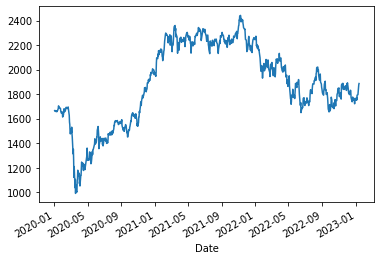

In [3]:
df.Close.plot()

In [4]:
df.to_csv("./data/Russel2000_20200101-.csv")

In [6]:
df_price = df.loc[:,["Adj Close"]].copy()
df_price.head()

,Adj Close
Date,
2020-01-02,1666.770020
2020-01-03,1660.869995
2020-01-06,1663.260010
2020-01-07,1658.310059
2020-01-08,1663.589966


In [14]:
datetime.datetime.strftime(df_price.index[0], "%Y-%m")

'2020-01'

In [16]:
# map 함수 사용으로 년도-월 데이터 생성
df_price["STD_YM"] = df_price.index.map(lambda x: datetime.datetime.strftime(x, "%Y-%m"))
df_price.head()

,Adj Close,STD_YM
Date,,
2020-01-02,1666.770020,2020-01
2020-01-03,1660.869995,2020-01
2020-01-06,1663.260010,2020-01
2020-01-07,1658.310059,2020-01
2020-01-08,1663.589966,2020-01


In [30]:
# 월별 데이터 중 월말일의 종가를 얻어와 새로운 데이터 프레임을 생성하는 코드
# 데이터 프레임 필터링을 통해 월말일의 인덱스를 찾는다.
df_price.loc[df_price.index[-1]]

Adj Close    1887.030029
STD_YM           2023-01
Name: 2023-01-13 00:00:00, dtype: object

In [39]:
df_price.loc[df_price[df_price['STD_YM'] == "2020-01"].index[-1], :]

Adj Close    1614.060059
STD_YM           2020-01
Name: 2020-01-31 00:00:00, dtype: object

In [47]:
# loc[[index]] => 데이터 프레임을 반환, loc[index] = 시리즈 객체를 반환
df_price.loc[[df_price.loc[df_price['STD_YM'] == "2020-01"].index[-1]]].reset_index()

,Date,Adj Close,STD_YM
0,2020-01-31,1614.060059,2020-01


In [49]:
month_list = df_price['STD_YM'].unique()
df_month_last = pd.DataFrame(columns=["Adj Close", "STD_YM"])

for m in month_list:
    month_last_day = df_price.loc[[df_price[df_price['STD_YM'] == m].index[-1]]]
    df_month_last = pd.concat([df_month_last, month_last_day.reset_index()])
df_month_last.set_index(['Date'], inplace=True)
df_month_last

,Adj Close,STD_YM
Date,,
2020-01-31,1614.060059,2020-01
2020-02-28,1476.430054,2020-02
2020-03-31,1153.099976,2020-03
2020-04-30,1310.660034,2020-04
2020-05-29,1394.040039,2020-05
2020-06-30,1441.369995,2020-06
2020-07-31,1480.430054,2020-07
2020-08-31,1561.880005,2020-08
2020-09-30,1507.689941,2020-09


In [63]:
df_month_last['BF_1M_Close'] = df_month_last.shift(1)["Adj Close"]
df_month_last['BF_12M_Close'] = df_month_last.shift(12)["Adj Close"]
#df_month_last.drop_na(inplace=True)
df_month_last.fillna(0, inplace=True)
df_month_last.head(15)

,Adj Close,STD_YM,BF_1M_Close,BF_12M_Close
Date,,,,
2020-01-31,1614.060059,2020-01,0.000000,0.000000
2020-02-28,1476.430054,2020-02,1614.060059,0.000000
2020-03-31,1153.099976,2020-03,1476.430054,0.000000
2020-04-30,1310.660034,2020-04,1153.099976,0.000000
2020-05-29,1394.040039,2020-05,1310.660034,0.000000
2020-06-30,1441.369995,2020-06,1394.040039,0.000000
2020-07-31,1480.430054,2020-07,1441.369995,0.000000
2020-08-31,1561.880005,2020-08,1480.430054,0.000000
2020-09-30,1507.689941,2020-09,1561.880005,0.000000


In [51]:
df_book = df_price.copy()

,Adj Close,STD_YM
Date,,
2020-01-02,1666.770020,2020-01
2020-01-03,1660.869995,2020-01
2020-01-06,1663.260010,2020-01
2020-01-07,1658.310059,2020-01
2020-01-08,1663.589966,2020-01
...,...,...
2023-01-09,1795.910034,2023-01
2023-01-10,1822.650024,2023-01
2023-01-11,1844.050049,2023-01


In [78]:
df_book['rtn'] = df_book["Adj Close"].pct_change()+1
df_book['sys_rtn']= 1
df_book.fillna(1, inplace=True)
df_book['trade'] = 0
df_book.head()

,Adj Close,STD_YM,rtn,sys_rtn,trade
Date,,,,,
2020-01-02,1666.770020,2020-01,1.000000,1,0
2020-01-03,1660.869995,2020-01,0.996460,1,0
2020-01-06,1663.260010,2020-01,1.001439,1,0
2020-01-07,1658.310059,2020-01,0.997024,1,0
2020-01-08,1663.589966,2020-01,1.003184,1,0


In [80]:
def trading():
    for index in df_month_last.index:
        signal = 0
        bf_12m = df_month_last.loc[index, "BF_12M_Close"]
        if bf_12m == 0.0: continue
        momentum_index = df_month_last.loc[index, "BF_1M_Close"] / df_month_last.loc[index, "BF_12M_Close"] -1
        #print(momentum_index)
        flag = True if ((momentum_index > 0.0) and (momentum_index != np.inf) and (momentum_index != -np.inf) and (momentum_index != np.nan)) else False and True
        if flag:
            signal = 1
        df_book.loc[index:, 'trade'] = signal
        

<AxesSubplot:xlabel='Date'>

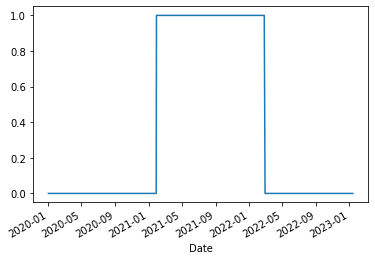

In [81]:
trading()
df_book.trade.plot()

<AxesSubplot:xlabel='Date'>

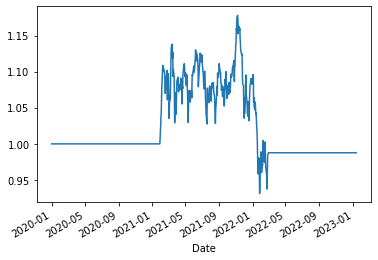

In [83]:
df_book['sys_pct_change'] = np.where(df_book.trade.shift(1) == 1, df_book.rtn, 1)
df_book.sys_rtn = df_book.sys_pct_change.cumprod()
df_book.sys_rtn.plot()

